In [1]:
import pandas as pd
import px_reader as px
from helpers import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
diplomes = read_file('diplomes.px')
diplomes.index.names = ['annee', 'diplome', 'filiere', 'nationalite']
diplomes.head(11)

BS BE FR GE LS LU NE  \
annee diplome  filiere                       nationalite                        
1993  Bachelor Mathematiques                 Suisses      0  0  0  0  0  0  0   
                                             Etrangers    0  0  0  0  0  0  0   
               Informatique                  Suisses      0  0  0  0  0  0  0   
                                             Etrangers    0  0  0  0  0  0  0   
               Astronomie                    Suisses      0  0  0  0  0  0  0   
                                             Etrangers    0  0  0  0  0  0  0   
               Physique                      Suisses      0  0  0  0  0  0  0   
                                             Etrangers    0  0  0  0  0  0  0   
               Sc. exactes pluridisc./autres Suisses      0  0  0  0  0  0  0   
                                             Etrangers    0  0  0  0  0  0  0   
               Chimie                        Suisses      0  0  0  0  0  0  0   

                                                         SG UZH USI Autres IU  \
annee diplome  filiere                       nationalite                        
1993  Bachelor Mathematiques                 Suisses      0   0   0         0   
                                             Etrangers    0   0   0         0   
               Informatique                  Suisses      0   0   0         0   
                                             Etrangers    0   0   0         0   
               Astronomie                    Suisses      0   0   0         0   
                                             Etrangers    0   0   0         0   
               Physique                      Suisses      0   0   0         0   
                                             Etrangers    0   0   0         0   
               Sc. exactes pluridisc./autres Suisses      0   0   0         0   
                                             Etrangers    0   0   0         0   
               Chimie                        Suisses      0   0   0         0   

                                                         EPFL ETHZ  
annee diplome  filiere                       nationalite            
1993  Bachelor Mathematiques                 Suisses        0    0  
                                             Etrangers      0    0  
               Informatique                  Suisses        0    0  
                                             Etrangers      0    0  
               Astronomie                    Suisses        0    0  
                                             Etrangers      0    0  
               Physique                      Suisses        0    0  
                                             Etrangers      0    0  
               Sc. exactes pluridisc./autres Suisses        0    0  
                                             Etrangers      0    0  
               Chimie                        Suisses        0    0

In [3]:
type_diplome = list(diplomes.index.get_level_values('diplome').unique())
type_filiere = list(diplomes.index.get_level_values('filiere').unique())
years = list(diplomes.index.get_level_values('annee').unique())

In [4]:
diplomes = parse_df(diplomes, 4)

In [5]:
diplomes = diplomes.groupby(['annee', 'diplome', 'nationalite']).sum()

In [307]:
def merge_BA_LI(df):
    for y in years:
        for n in ['Etrangers', 'Suisses']:
            try : 
                df.loc[(y, 'Bachelor', n)] += df.loc[(y, 'Licences/Diplemes', n)]
            except KeyError :
                print(y, n)
    return df.drop('Licences/Diplemes', level = 'diplome')

In [310]:
diplomes = merge_BA_LI(diplomes)

In [6]:
diplomes.tail(10)

LS   LU    NE   SG    UZH    USI  \
annee diplome           nationalite                                        
2015  Master            Etrangers     40.0  0.0  17.0  0.0   56.0  124.0   
                        Suisses      155.0  0.0  51.0  0.0  166.0   33.0   
2016  Bachelor          Etrangers     20.0  0.0   2.0  0.0   17.0  100.0   
                        Suisses      172.0  0.0  58.0  0.0  226.0   35.0   
      Doctorats         Etrangers     69.0  0.0  23.0  0.0  145.0    9.0   
                        Suisses       37.0  0.0  10.0  0.0   67.0    2.0   
      Licences/Diplemes Etrangers      0.0  0.0   0.0  0.0    0.0    0.0   
                        Suisses        0.0  0.0   0.0  0.0    0.0    0.0   
      Master            Etrangers     29.0  0.0  16.0  0.0   53.0  129.0   
                        Suisses      157.0  0.0  45.0  0.0  170.0   21.0   

                                     Autres IU   EPFL    ETHZ  
annee diplome           nationalite                            
2015  Master            Etrangers          0.0  442.0   601.0  
                        Suisses            0.0  458.0   968.0  
2016  Bachelor          Etrangers          0.0  421.0   273.0  
                        Suisses            0.0  508.0  1123.0  
      Doctorats         Etrangers          0.0  334.0   500.0  
                        Suisses            0.0   64.0   244.0  
      Licences/Diplemes Etrangers          0.0    0.0     0.0  
                        Suisses            0.0    0.0     0.0  
      Master            Etrangers          0.0  419.0   618.0  
                        Suisses            0.0  519.0  1072.0

In [7]:
def get_df_for_uni(uni, summarized = True):
    uni_df = pd.DataFrame(columns = type_diplome)
    uni_df.insert(loc=0, column='annee', value=years)
    uni_df = uni_df.set_index('annee')
    tmp_df = diplomes[[uni]]
    if summarized:
        tmp_df = tmp_df.groupby(['annee', 'diplome']).sum()
        for y in years:
            uni_df.loc[y] = list((tmp_df.loc[y][uni].reset_index())[uni])
        uni_df['Total'] = uni_df[type_diplome].sum(axis=1)
        return uni_df#.drop('Licences/Diplemes', axis = 1)
    else:
        return tmp_df

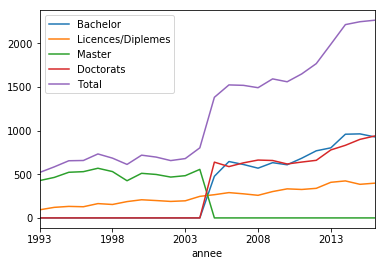

In [9]:
summ_uni = get_df_for_uni('EPFL')
summ_uni.plot(kind = 'line')